In [1]:
from trends_analyzer.trends_analyzer.analyzer_modules import TimeSeriesAnalyzer
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
trend_name = TimeSeriesAnalyzer(keyword='хонкай', timeframe='today 5-y')

In [3]:
# 1. Посмотрим исходные данные
print("Исходные данные:")
print(trend_name.data.head())

Исходные данные:
date
2019-11-03    0
2019-11-10    0
2019-11-17    0
2019-11-24    0
2019-12-01    0
Name: хонкай, dtype: int64


In [4]:
# 2. Вычисление скользящего среднего
moving_avg = trend_name.calculate_moving_average(window_size = 7)
print("\nСкользящее среднее:")
print(moving_avg.head())



Скользящее среднее:
date
2019-11-03   NaN
2019-11-10   NaN
2019-11-17   NaN
2019-11-24   NaN
2019-12-01   NaN
Name: хонкай, dtype: float64


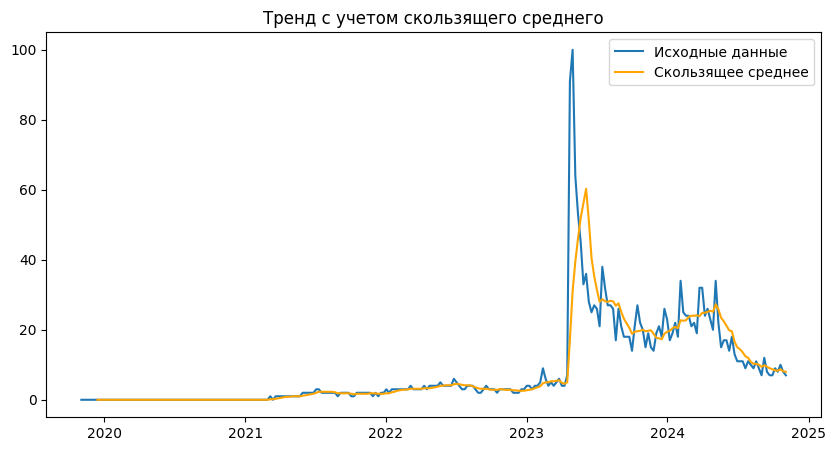

In [5]:
# График скользящего среднего
plt.figure(figsize=(10, 5))
plt.plot(trend_name.data, label="Исходные данные")
plt.plot(moving_avg, label="Скользящее среднее", color="orange")
plt.title("Тренд с учетом скользящего среднего")
plt.legend()
plt.show()

In [6]:
# 3. Вычисление дифференциала
differential = trend_name.calculate_differential()
print("\nДифференциал скользящего среднего:")
print(differential.head())


Дифференциал скользящего среднего:
date
2019-11-03   NaN
2019-11-10   NaN
2019-11-17   NaN
2019-11-24   NaN
2019-12-01   NaN
Name: хонкай, dtype: float64


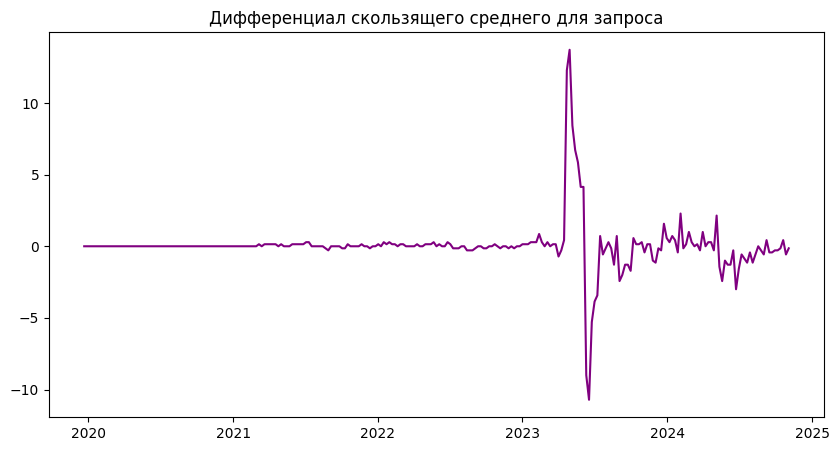

In [7]:
# График дифференциала
plt.figure(figsize=(10, 5))
plt.plot(differential, color="purple")
plt.title("Дифференциал скользящего среднего для запроса")
plt.show()

In [9]:
# 5. Поиск максимумов и минимумов
maxima = trend_name.find_maxima()
minima = trend_name.find_minima()
print("\nЛокальные максимумы:")
print(maxima.head())
print("\nЛокальные минимумы:")
print(minima.head())


Локальные максимумы:
date
2022-07-03     4.571429
2023-03-26     5.571429
2023-06-04    60.285714
2023-07-16    28.714286
2023-08-06    28.285714
Name: хонкай, dtype: float64

Локальные минимумы:
date
2021-10-10     1.571429
2023-04-09     4.571429
2023-07-09    28.000000
2023-07-30    28.000000
2023-08-20    26.857143
Name: хонкай, dtype: float64


In [8]:
# 4. Автокорреляция
auto_correlation = trend_name.calculate_auto_correlation()
print("\nАвтокорреляция:")
print(auto_correlation.head())


Автокорреляция:
date
2019-11-03   NaN
2019-11-10   NaN
2019-11-17   NaN
2019-11-24   NaN
2019-12-01   NaN
dtype: float64


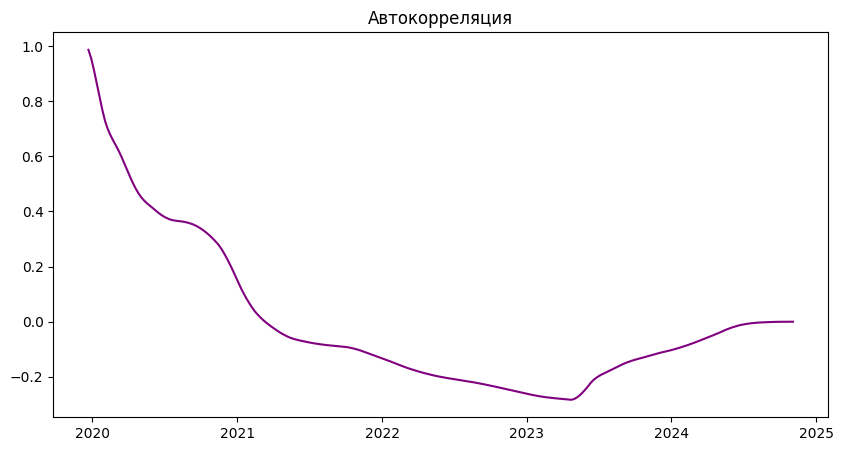

In [15]:
# График автокорреляции
plt.figure(figsize=(10, 5))
plt.plot(auto_correlation, color="purple")
plt.title("Автокорреляция")
plt.show()

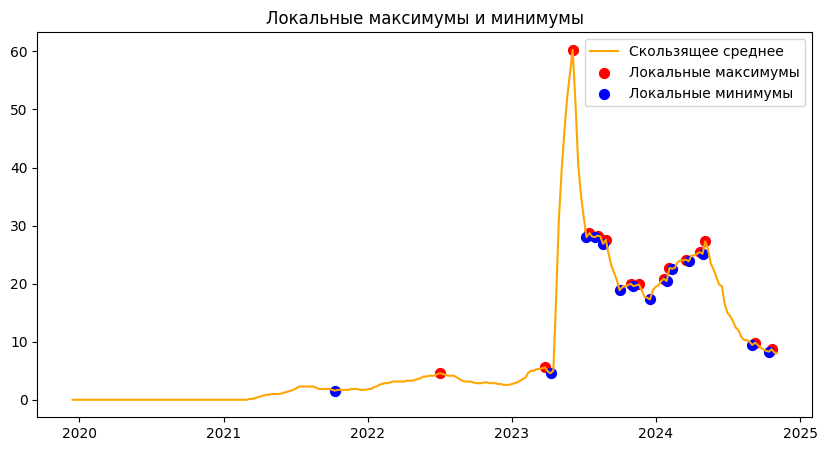

In [10]:
# График максимумов и минимумов
plt.figure(figsize=(10, 5))
plt.plot(moving_avg, label="Скользящее среднее", color="orange")
plt.scatter(maxima.index, maxima.values, color='red', label="Локальные максимумы", s=50)
plt.scatter(minima.index, minima.values, color='blue', label="Локальные минимумы", s=50)
plt.title("Локальные максимумы и минимумы")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Скользящее среднее')

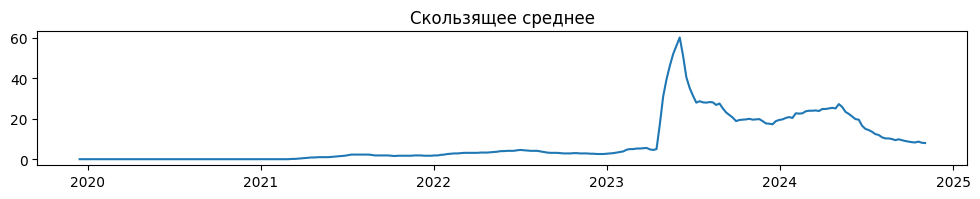

In [11]:
# Графики декомпозиции
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(moving_avg, label="Скользящее среднее")
plt.title("Скользящее среднее")


In [12]:
# 7. Сохранение результатов в DataFrame
results_df = trend_name.get_results()
print("\nИтоговый DataFrame с результатами анализа:")
print(results_df.head())



Итоговый DataFrame с результатами анализа:
            Moving Average  Differential  Auto correlation  Maxima  Minima
date                                                                      
2019-11-03             NaN           NaN               NaN     NaN     NaN
2019-11-10             NaN           NaN               NaN     NaN     NaN
2019-11-17             NaN           NaN               NaN     NaN     NaN
2019-11-24             NaN           NaN               NaN     NaN     NaN
2019-12-01             NaN           NaN               NaN     NaN     NaN


In [13]:
# Сохранение DataFrame в Excel
results_df = trend_name.get_results()
print("\nИтоговый DataFrame с результатами анализа:")
print(results_df.head())

# Убедитесь, что индекс является DatetimeIndex
if not isinstance(results_df.index, pd.DatetimeIndex):
    results_df.index = pd.to_datetime(results_df.index)

# Преобразование индекса в строковый формат даты
results_df.index = results_df.index.strftime('%Y-%m-%d')

# Сохранение DataFrame в Excel файл
results_df.to_excel("results.xlsx", index=True)
print("Результаты анализа сохранены в 'results.xlsx'")


Итоговый DataFrame с результатами анализа:
            Moving Average  Differential  Auto correlation  Maxima  Minima
date                                                                      
2019-11-03             NaN           NaN               NaN     NaN     NaN
2019-11-10             NaN           NaN               NaN     NaN     NaN
2019-11-17             NaN           NaN               NaN     NaN     NaN
2019-11-24             NaN           NaN               NaN     NaN     NaN
2019-12-01             NaN           NaN               NaN     NaN     NaN
Результаты анализа сохранены в 'results.xlsx'
